# Pandas II

<img src="https://i1.wp.com/numfocus.org/wp-content/uploads/2016/07/pandas-logo-300.png?fit=300%2C300&ssl=1" width="200">

In our previous notebook we saw the internals of pandas and that pandas is comprised of 3 objects: 
1. Index
1. Series
1. DataFrame  

We also saw that all 3 objects wrap a numpy array inside them. We saw how to query these objects, how they can leverage the power of numpy universal function and finished with how we can concatenate these objects together.

In [ ]:
import pandas as pd
import numpy as np

## Merges
***
We saw we can "stitch" together DataFrames and Series using the pandas concat method and the append methods which works like we are operating on a list.


But, in many cases we would like to perform smarter merges between dataframes. There is an entire universe and probably and entire course one can teach on databases merges and joins, but we will keep the discussion simple, mainly showcasing the more common operation and showing those who wish to take the longer path it's beginning.

This get us into the world of `pd.merge` We will talk about 4 of the merge types it supply for us:
1. __Inner__ 
1. __Outer__ 
1. __Left__
1. __Right__

Throughout this section we will work with the following toy dataset:

In [ ]:
df_left = pd.DataFrame(data={
    'Student' : ['michael', 'kobe', 'larry', 'james', 'kevin'],
    'Age' : [23, 24, 33, 23, 35]
})

df_right = pd.DataFrame(data={
    'Student' : ['michael', 'larry', 'kevin', 'stephen'],
    'Courses' : ['Machine Learning', 'Deep Learning', 'Statistics', 'Cloud Computing']
})

In [ ]:
df_left

In [ ]:
df_right

### Inner 
The default merge is the inner merge. This will look for a common column, which will serve as the merge by column (each value in this column is a key), and will return the intersection between the keys. Any key which is not on one of the tables will be ignored.

In [ ]:
pd.merge(df_left, df_right)

### Outer
If the inner join returned the intersection between the key, than the outer merge returns the union between the keys, filling up nan where a value is missing.  
To specify the merge type we used the `how` parameter.

In [ ]:
pd.merge(df_left, df_right, how='outer')

### Left
As one might expect the left merge return all the keys in the left dataframe filling in nan where values are missing

In [ ]:
pd.merge(df_left, df_right, how='left')

### Right
And you guessed it the right merge returns all the keys in the right table filling in nan where values are missing

In [ ]:
pd.merge(df_left, df_right, how='right')

In the above example we used the fact that we add a single column which was in both of the datasets.  
There are cases where the is more than one joined columns, and there are times where the columns we wish to merge on have different names. All of these problems can be solved by passing in the correct parameters to the merge method which you will query in the next exercise.

***
## Exercise
***

In [ ]:
df_names = pd.DataFrame(data={
    'Product' : ['shampoo', 'soap', 'tooth paste', 'toilet paper', 'sponage']
}, index = ['412', '333', '525', '111', '212'])

df_prices = pd.DataFrame(data={
    'price' : [12, 15, 13, 17, 26]
}, index = ['412', '333', '525', '111', '555'])

__Find out the price of each product using a merge operation, keep all products but discard irrelevant prices. (keep the result in a new dataframe)__  
Read the merge docs to find out how to merge on the index

In [ ]:
merged = None
# Your code starts here

# Your code ends here
merged

In [ ]:
df_super_aisle = pd.DataFrame({
    'type' : ['shampoo', 'soap', 'tooth paste', 'toilet paper', 'sponage'],
    'aisle' : [0, 0, 12, 15, 9]
})

__Create a dataframe holding both the product price and the aisle it should be in the supermarket__

In [ ]:
res = None
# Your code starts here

# Your code ends here
res

In [ ]:
df_super_owner = pd.DataFrame({
    'owner' : ['Dave', 'Sean', 'Ashely', 'Gal'],
    'aisle' : [0, 12, 15, 9]
})

__Find out who is in charge for each product(type - shampoo, soap, etc..)__

In [ ]:
res = None
# Your code starts here

# Your code ends here
res

## Aggregation & Grouping
We have seen that numpy provides a handful of aggregation functions we can use the get statistics of our arrays.  
We can harvest those function in pandas as well.

### Series Aggregation
Aggregation over a series works the same as it does on 1d numpy array :

In [ ]:
np.random.seed(1234)
s = pd.Series(np.random.randint(low=10, high=100, size=10))
s

In [ ]:
s.mean(), s.std(), s.max()

### Dataframes aggregation
As one might expect the aggregation over a dataframe will default into preforming columns wise aggregation:

In [ ]:
np.random.seed(4321)
df = pd.DataFrame(np.random.randint(low=10, high=80, size=(12, 4)), columns=['A', 'B', 'C', 'D'])
df

In [ ]:
df.mean()

As we can see we get back the mean over each column (the return value is a series).  
And as one might suspect, pandas aggregation functions give us the opportunity to supply a axis parameter which will enable us to choose the aggregation axis.

In [ ]:
df.mean(axis=1)

Again the returned type is a Series, notice that the index of the series is derived by the index of the axis on which we operate. The column index if we operate on axis 0 and the row index if we operate on the 1 axis.  
While this is nice, in many cases when we work on dataframes we which to preform our aggregation of groups inside the dataframes. For example we could have a **gender** column and we would like to aggregate over the Female and Male separately.  

### Group By
Here is an example:

In [ ]:
np.random.seed(10)

keys = np.random.choice(list('ABC'), size=12)
f_value = np.random.randint(low=0, high=50, size=12)
s_value = np.random.randint(low=0, high=50, size=12)

df = pd.DataFrame({
    'keys' : keys,
    'f_value' : f_value,
    's_value' : s_value
})

df

So imagine that we would like the mean value of `f_value` and `s_value` but we would like to get the statistics for each key separately. Here's how we do it:

In [ ]:
df.groupby('keys').mean()

If your wondering why the `keys` value is written there, that's because an index could have a name. (example on scratchpad).

Ok, so what just happened here:  
### Split - Apply - Combine
The process we just noticed is referred to as __split $\rightarrow$ apply $\rightarrow$ combine__
1. __Split__ - We split our dataframes in to different groups of dataframes.
1. __Apply__ - We apply some aggregation over each group separately.
1. __Combine__ - We combine all the results in to one unified data frame.

Here is in illustration:

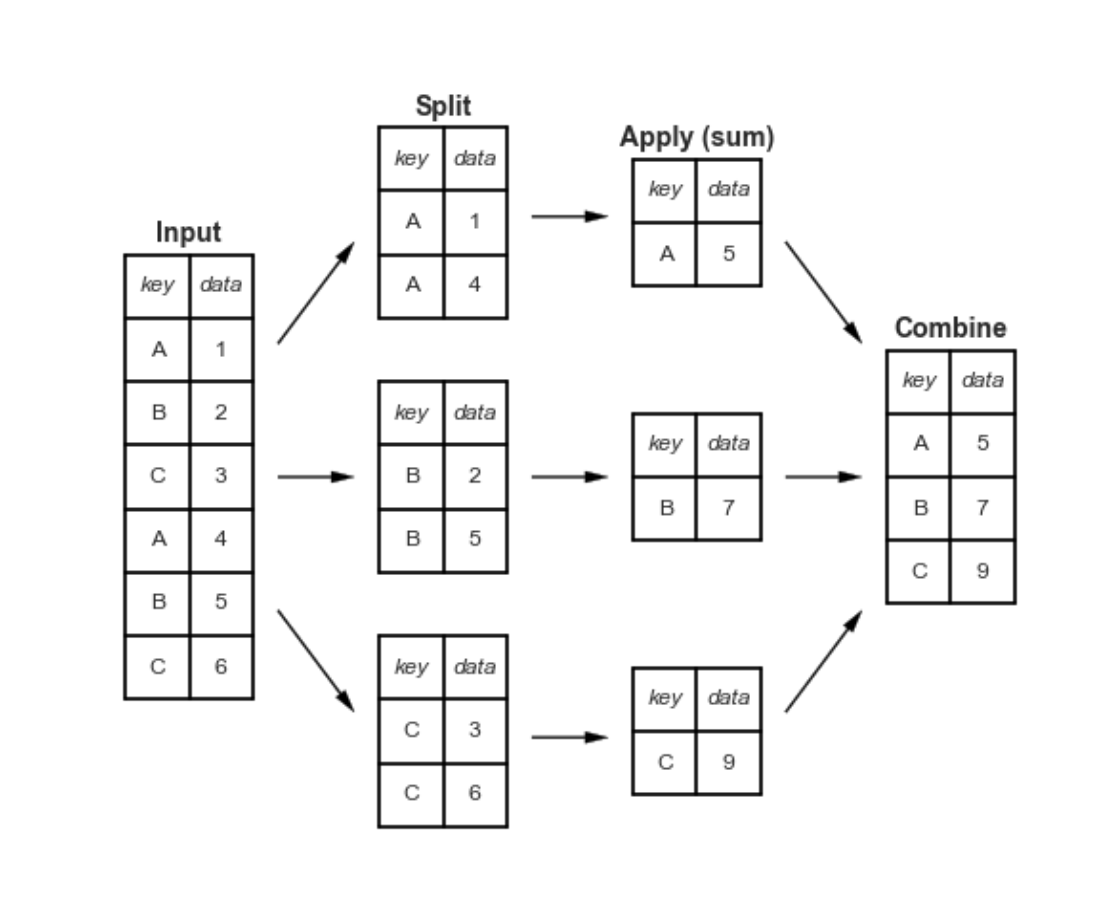

Another example:

In [ ]:
df.groupby('keys').count()

#### Group by
When we perform the group by operation we get back a gropuby object:

In [ ]:
g = df.groupby('keys')
type(g)

__Notice__ : One might expect that after the groupby call we would get back each group as a separate dataframe. This is not the case. The groupby mechanism is intended to work as part of the split-aggregation-combine workflow and in practice it does so by creating 'views' into the original dataframe. This is intended to save space and time that will require to create all of these groups as a stand alone dataframes. 

Let's dive deeper - Instead of using one of pandas built in apply methods we will write our own and play with it.

In [ ]:
def my_apply(df):
    print (df)
    print('-' * 20)
    return None
    
result = df.groupby('keys').apply(my_apply)
print('*' * 20)
print(result)

You might ask yourself why the 'A' group printed twice? I know I asked myself this question. The answer is that pandas run the first group twice, in order to analyze whether it could use some internal optimization or not, it ignores the first value returned. Be aware in case you are trying to do something which will change on every iteration (if you save an outside count of some sort).

Now, let's see we can emulate the mean behavior using the apply method:

In [ ]:
def my_apply(df):
    return df.mean()

result = df.groupby('keys').apply(my_apply)
result == df.groupby('keys').mean()

This open the doors to creating your own customs aggregation:

In [ ]:
def range_size(df):
    return df.max() - df.min()

df.groupby('keys').apply(range_size)

Let's say I only want aggregation over one of the columns. I have a couple of ways I can tackle that :  
1. Work only on the specific column
1. Extract the column at the end


In [ ]:
df.groupby('keys')['s_value'].mean()

In [ ]:
df.groupby('keys')['s_value'].mean() == df.groupby('keys').mean()['s_value']

Unless you have a very good reason you should go for the first option and not the second. In the second options your computing information you don't need. Which means you are wasting time and resources. Don't be that person.

__Summing up:__  
The split-apply-combine flow enabled by the `groupby` method is a very convenient way of aggregating over specific groups in the data. You can use pandas built in aggregation function such as (`min`, `max`, `mean` etc..) or build your own apply function which can be as complex as possible.

### apply
It's worth noting the apply method is not restricted to the groupby operation. The apply method in pandas allow you to iterate either columns or rows and execute a piece of code on each column / row. If you use apply on a Series you simply iterate over values.  
Here is an example of applying over a series:

In [ ]:
def lower_case(letter):
    return letter.lower()

df['keys'].apply(lower_case)

Here is an example of applying over a dataframe:

In [ ]:
def concat_row_to_str(row):
    s = ''
    for v in row.values:
        s += str(v) 
        
    return s
    
df.apply(concat_row_to_str, axis=1)

***
## Exercise 
***

In [ ]:
from sklearn import datasets

wine_dataset = datasets.load_wine()

In [ ]:
X = wine_dataset.data
y = wine_dataset.target

df = pd.DataFrame(X, columns=wine_dataset.feature_names)
df = pd.concat([df, pd.Series(y, name='quality')], axis=1)

df.head()

__Find the mean `alcohol` level in each `quality` group__

In [ ]:
# Your code starts here

# Your code ends here

__Find the average `quality` and the count of wines with `magnesium` bigger then 100 and smaller than 100__  
Meaning you should display the average quality and the number of wines used to compute this average.  
Look in the docs of pandas [agg function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) for how to perform more than one aggregation after the groupby command.
* You can change the original dataframe

In [ ]:
# Your code starts here

# Your code ends here

__Find the mean and standard deviation of the `ash` values in the following groups__:
1. all wines with flavanoids of above 3
1. all wines with flavanoids of between 2 and 3
1. all wines with flavanoids of below 2  


- You can change the original dataframe

In [ ]:
# Your code starts here

# Your code ends here

# References

- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) A thorough tour into Numpy. 
- [How to use the Split-Apply-Combine strategy in Pandas groupby](https://towardsdatascience.com/how-to-use-the-split-apply-combine-strategy-in-pandas-groupby-29e0eb44b62e) An excellent blog summarizing the split apply combine flow.

# Colophon
This notebook was written by __Yoav Orlev__ and is part of the __intro to Python for data science__ course at IDC Herzliya.

This work is licensed under a CC BY-NC-SA 4.0 International License.